# mô tả dữ liệu

* Mục đích của tệp dữ dùng để xây dựng mô hình dịch máy chính xác và linh hoạt
* Cụ thể dịch từ tiếng anh sang tiếng việt


* Tệp dữ liệu đã được dịch bằng... độ chính xác đã được sửa lỗi

* Kích thước của tệp dữ liệu

* Tệp dữ liệu có 4 tệp 2 file tiếng anh và 2 file tiếng việt
file lớn nhất khoảnge 6tr từ, file nhỏ nhất khoảng 55k từ

* Ngữ cảnh văn bản là các câu,đoạn văn,bài viết tiểu thuyết,câu chuyện
 - chủ đề về lịch sử nhân vật,khoa học đời sống....
 - tập dữ liệu có thể bao gồm các thể loại văn bản khác nhau như tin tức, bài viết blog, sách, bài báo khoa học

* quá trình thu thập dữ liệu: downloads trên kaggle,...đã được xử lý làm sạch chuẩn hóa.

# Phân tích dữ liệu

### Khai báo thư viện cần sử dụng

In [70]:
import pandas as pd
import os
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Đọc dữ liệu

In [67]:
dataset3_path = "/content/drive/MyDrive/dataset3"
path = "/content/drive/MyDrive/dataset3"

In [ ]:
train_dataset3_en = pd.read_csv(os.path.join(dataset3_path, "train.en"), sep="\t", names=["en"])
test_dataset3_en = pd.read_csv(os.path.join(dataset3_path, "tst2012.en"), sep="\t", names=["en"])

<ipython-input-43-1b6139a0a444>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  train_dataset3_en = pd.read_csv(os.path.join(dataset3_path, "train.en"), sep="\t", names=["en"])


In [ ]:
train_dataset3_vi = pd.read_csv(os.path.join(dataset3_path, "train.vi"), sep="\t", names=["vi"])
test_dataset3_vi = pd.read_csv(os.path.join(dataset3_path, "tst2012.vi"), sep="\t", names=["vi"])

<ipython-input-44-a2a0d48f4e02>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  train_dataset3_vi = pd.read_csv(os.path.join(dataset3_path, "train.vi"), sep="\t", names=["vi"])


In [68]:
train_en = pd.read_csv(path + "/train.en", delimiter="\t")

<ipython-input-68-2bc3e5d6e5c8>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  train_en = pd.read_csv(path + "/train.en", delimiter="\t")


In [73]:

train_vi = pd.read_csv(path + "/train.vi", delimiter="\t")

<ipython-input-73-c3346b8428b0>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  train_vi = pd.read_csv(path + "/train.vi", delimiter="\t")


### Tìm hiểu về dữ liệu

In [69]:
train_en.head()

,Rachel Pike : The science behind a climate headline,Unnamed: 1
0,"In 4 minutes , atmospheric chemist Rachel Pike...",NaN
1,I &apos;d like to talk to you today about the ...,NaN
2,Headlines that look like this when they have t...,NaN
3,They are both two branches of the same field o...,NaN
4,Recently the headlines looked like this when t...,NaN


In [74]:
train_vi.head()

,Khoa học đằng sau một tiêu đề về khí hậu,Unnamed: 1
0,"Trong 4 phút , chuyên gia hoá học khí quyển Ra...",NaN
1,Tôi muốn cho các bạn biết về sự to lớn của nhữ...,NaN
2,Có những dòng trông như thế này khi bàn về biế...,NaN
3,Cả hai đều là một nhánh của cùng một lĩnh vực ...,NaN
4,Các tiêu đề gần đây trông như thế này khi Ban ...,NaN


In [ ]:
print(train_dataset3_en)

In [ ]:
print(test_dataset3_en)

In [ ]:
print(train_dataset3_vi)

In [ ]:
print(test_dataset3_vi)

In [ ]:
train_dataset3_vi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402643 entries, Khoa học đằng sau một tiêu đề về khí hậu to nan
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   vi      269438 non-null  object
dtypes: object(1)
memory usage: 6.1+ MB


In [ ]:
test_dataset3_vi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4659 entries, Làm sao tôi có thể trình bày trong 10 phút về sợi dây liên kết những người phụ nữ qua ba thế hệ , về việc làm thế nào những sợi dây mạnh mẽ đáng kinh ngạc ấy đã níu chặt lấy cuộc sống của một cô bé bốn tuổi co quắp với đứa em gái nhỏ của cô bé , với mẹ và bà trong suốt năm ngày đêm trên con thuyền nhỏ lênh đênh trên Biển Đông hơn 30 năm trước , những sợi dây liên kết đã níu lấy cuộc đời cô bé ấy và không bao giờ rời đi -- cô bé ấy giờ sống ở San Francisco và đang nói chuyện với các bạn hôm nay ? to nan
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vi      3106 non-null   object
dtypes: object(1)
memory usage: 72.8+ KB


In [ ]:
train_dataset3_en.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267887 entries, Rachel Pike : The science behind a climate headline to nan
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   en      134719 non-null  object
dtypes: object(1)
memory usage: 4.1+ MB


In [ ]:
test_dataset3_en.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3106 entries, How can I speak in 10 minutes about the bonds of women over three generations , about how the astonishing strength of those bonds took hold in the life of a four-year-old girl huddled with her young sister , her mother and her grandmother for five days and nights in a small boat in the China Sea more than 30 years ago , bonds that took hold in the life of that small girl and never let go -- that small girl now living in San Francisco and speaking to you today ? to nan
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   en      1553 non-null   object
dtypes: object(1)
memory usage: 48.5+ KB


- có thể thấy dữ liệu đều là kiểu định tính object

###Phân tích từ vựng (Vocabulary analysis):

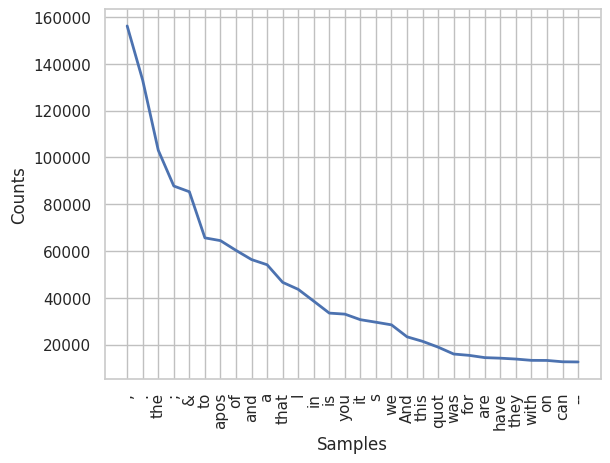

In [71]:
# Tokenize và tính toán tần suất từ vựng
words = word_tokenize(train_en['Rachel Pike : The science behind a climate headline'].str.cat(sep=' '))
fdist = FreqDist(words)

# Số lượng từ riêng biệt trong tập dữ liệu
vocab_size = len(fdist)

# 10 từ xuất hiện nhiều nhất
most_common_words = fdist.most_common(10)

# Trực quan hóa tần suất từ vựng
fdist.plot(30, cumulative=False)
plt.show()

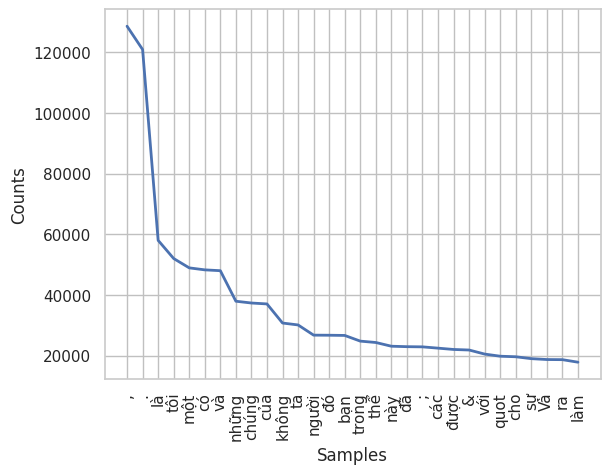

In [75]:
# Tokenize và tính toán tần suất từ vựng
words = word_tokenize(train_vi['Khoa học đằng sau một tiêu đề về khí hậu'].str.cat(sep=' '))
fdist = FreqDist(words)

# Số lượng từ riêng biệt trong tập dữ liệu
vocab_size = len(fdist)

# 10 từ xuất hiện nhiều nhất
most_common_words = fdist.most_common(10)

# Trực quan hóa tần suất từ vựng
fdist.plot(30, cumulative=False)
plt.show()

Ở trục x của biểu đồ, chúng ta có các từ từ vựng riêng biệt trong tập dữ liệu. Ở trục y, chúng ta có tần suất xuất hiện của các từ đó. Các thanh dọc trong biểu đồ thể hiện tần suất của các từ tương ứng.

Đồ thị có thể giúp chúng ta hiểu được phân phối từ vựng trong tập dữ liệu. Các từ xuất hiện nhiều hơn sẽ có các thanh dọc cao hơn, trong khi các từ xuất hiện ít hơn sẽ có các thanh dọc thấp hơn.

Đồ thị này cũng giúp chúng ta xác định các từ phổ biến nhất trong tập dữ liệu. Trong trường hợp này, most_common_words chứa danh sách 10 từ xuất hiện nhiều nhất. Bạn có thể sử dụng biểu đồ và danh sách này để hiểu thêm về phân phối từ vựng và các từ quan trọng trong tập dữ liệu.

###Phân tích độ dài văn bản (Text length analysis):

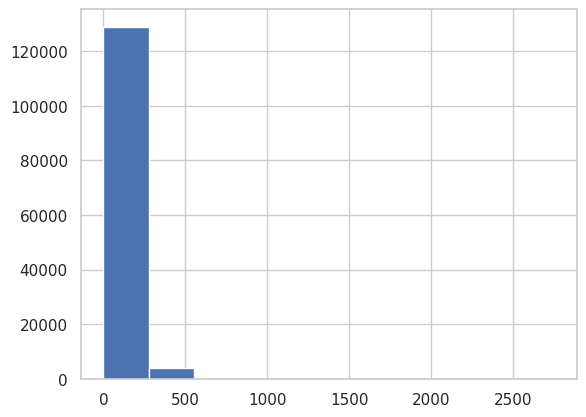

In [72]:
# Độ dài trung bình của các văn bản
average_length = train_en['Rachel Pike : The science behind a climate headline'].str.len().mean()

# Văn bản có độ dài lớn nhất
max_length_text = train_en['Rachel Pike : The science behind a climate headline'].str.len().max()

# Văn bản có độ dài nhỏ nhất
min_length_text = train_en['Rachel Pike : The science behind a climate headline'].str.len().min()

# Phân phối độ dài văn bản
length_distribution = train_en['Rachel Pike : The science behind a climate headline'].str.len().hist()
plt.show()


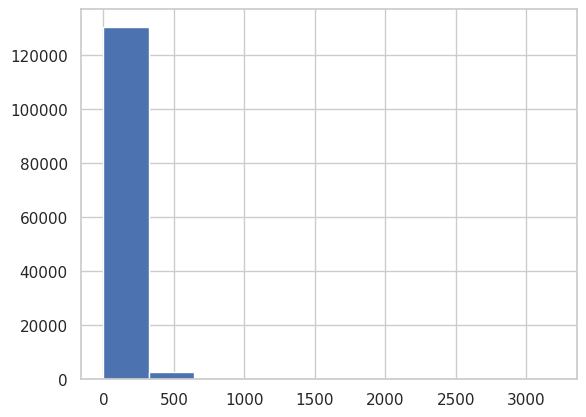

In [76]:
# Độ dài trung bình của các văn bản
average_length = train_vi['Khoa học đằng sau một tiêu đề về khí hậu'].str.len().mean()

# Văn bản có độ dài lớn nhất
max_length_text = train_vi['Khoa học đằng sau một tiêu đề về khí hậu'].str.len().max()

# Văn bản có độ dài nhỏ nhất
min_length_text = train_vi['Khoa học đằng sau một tiêu đề về khí hậu'].str.len().min()

# Phân phối độ dài văn bản
length_distribution = train_vi['Khoa học đằng sau một tiêu đề về khí hậu'].str.len().hist()
plt.show()

Biểu đồ này biểu diễn phân phối độ dài của các văn bản trong tập dữ liệu.

Trục x của biểu đồ hiển thị các khoảng độ dài văn bản. Trục y thể hiện số lượng văn bản trong mỗi khoảng độ dài.

Biểu đồ histogram cho chúng ta cái nhìn tổng quan về phân phối độ dài của văn bản trong tập dữ liệu. Các cột trong biểu đồ thể hiện số lượng văn bản nằm trong mỗi khoảng độ dài tương ứng. Điều này giúp chúng ta hiểu được phân bố độ dài văn bản, xem có xu hướng nào hay phân bố nào đặc biệt trong tập dữ liệu.
